In [16]:
import sys
sys.path.append("../")
from Linearity import Neuron
import numpy as np
import scipy.stats as ss
import matplotlib
import matplotlib.pyplot as plt
from pickle import dump, load
plt.style.use('neuron')
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import set_matplotlib_formats

In [17]:
def simpleaxis(axes, every=False, outward=False):
    if not isinstance(axes, (list, np.ndarray)):
        axes = np.array([axes])
    for ax in np.array(axes).flatten():
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        if (outward):
            ax.spines['bottom'].set_position(('outward', 10))
            ax.spines['left'].set_position(('outward', 10))
        if every:
            ax.spines['bottom'].set_visible(False)
            ax.spines['left'].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_title('')

In [43]:
def plotGrid(filename):
    ca1_neuron = Neuron.load(filename)
    AP_dict = np.zeros((13,13))
    SubThP_dict = np.zeros((13,13))
    for expType, exp in ca1_neuron:
        if expType == "Control":
            for coord in exp[1].coordwise:
                temp_coord = []
                temp_value = []
                for trial in exp[1].coordwise[coord].trials:
                    temp_coord.append(trial.AP_flag)
                    if not trial.AP_flag:
                        temp_value.append(trial.feature[0])
                SubThP_dict[list(coord)[0]] = np.nanmean(temp_value)        
                AP_dict[list(coord)[0]] = np.nansum(temp_coord)
    SubThP_dict = np.ma.masked_where(SubThP_dict == 0., SubThP_dict)

    vmax = np.nanmax(SubThP_dict)
    vmin = np.nanmin(SubThP_dict)
    cmap = LinearSegmentedColormap.from_list('CA3_reds', [(0., 'white'), (1., (170/256., 0, 0))])
    cmap.set_bad(color='white')


    fig, ax = plt.subplots()
    heatmap = ax.pcolormesh(SubThP_dict, cmap=cmap, vmin=vmin, vmax=vmax)

    # mark a specific square?
    zeros = np.zeros((13,13))
    stim_coords = np.where(SubThP_dict>0)
    zeros[stim_coords] = 1.
    stim_coords = np.where(AP_dict>0)
    zeros[stim_coords] = 1.

    c = np.ma.masked_array(zeros, zeros == 0.)  # mask squares where value == 1
    ax.pcolormesh(np.arange(14), np.arange(14), c, alpha=0.5, zorder=2, facecolor='none', edgecolors='k',
                   cmap='gray', linewidth=1.)

    for y in range(AP_dict.shape[0]):
        for x in range(AP_dict.shape[1]):
            if AP_dict[y, x] > 0:
                plt.text(x + 0.5, y + 0.5, "{}".format(int(AP_dict[y, x])),
                         horizontalalignment='center',
                         verticalalignment='center', size=10)

    ax.invert_yaxis()
    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_ticks(np.arange(1,14), minor=True)
        axis.set(ticks=np.arange(0,14,2)+0.5, ticklabels=np.arange(0,14,2)) #Skipping square labels

    ax.grid(True, which='minor', axis='both', linestyle='--', alpha=0.1, color='k')
    ax.set_xlim((0,13))
    ax.set_ylim((0,13))

    #Colorbar stuff
    cbar = plt.colorbar(heatmap, label="Average response (mV)")
    cbar.ax.get_yaxis().labelpad = 6
    tick_locator = matplotlib.ticker.MaxNLocator(nbins=5)
    cbar.locator = tick_locator
    cbar.update_ticks()

    ax.set_aspect(1)
    fig.set_figheight(8.)
    fig.set_figwidth(8.5)
    simpleaxis(ax,every=True,outward=False)
    # dump(fig,file('figures/fig1/1b.pkl','wb'))
plt.show()

In [39]:
filename = '/media/sahil/NCBS_Shares_BGStim/patch_data/190111/c2/plots/c2.pkl'

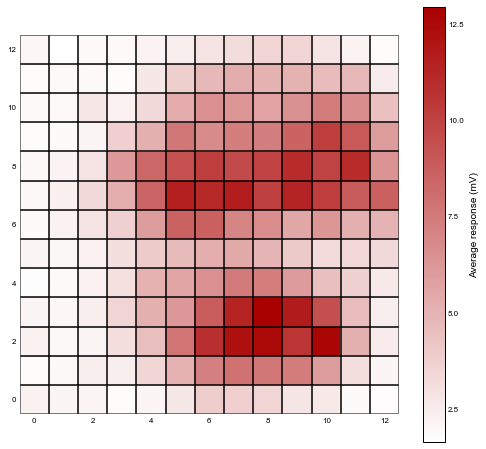

In [41]:
plotGrid('/media/sahil/NCBS_Shares_BGStim/patch_data/190111/c1/plots/c1.pkl')

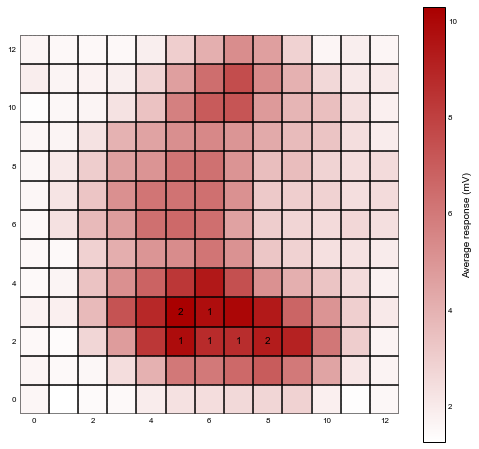

In [45]:
plotGrid('/media/sahil/NCBS_Shares_BGStim/patch_data/190111/c2/plots/c2.pkl')

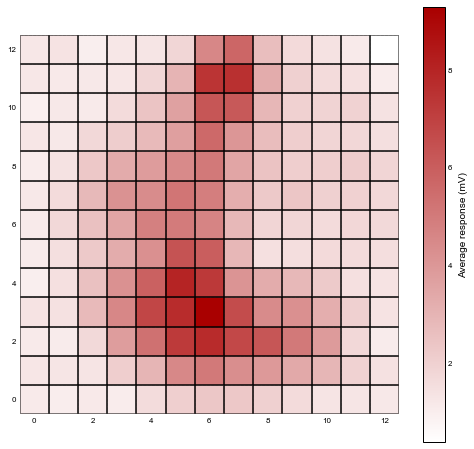

In [46]:
plotGrid('/media/sahil/NCBS_Shares_BGStim/patch_data/190111/c3/plots/c3.pkl')